In [23]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.insert(0, PROJECT_ROOT)

print("Project root added:", PROJECT_ROOT)

Project root added: c:\Users\hp\Documents\10-acad\week7\Intelligent-Complaint-Analysis-for-Financial-Services


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", 200)
sns.set_style("whitegrid")

In [2]:
RAW_DATA_PATH = "../data/raw/complaints.csv"
df = pd.read_csv(RAW_DATA_PATH)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_22064\3489110659.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(RAW_DATA_PATH)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in the complaint,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [3]:
df.shape

(9609797, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [5]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
df["Product"].value_counts().head(10)

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Name: count, dtype: int64

In [7]:
TARGET_PRODUCTS = [
    "Credit reporting or other personal consumer reports",
    "Debt collection",
    "Mortgage",
    "Checking or savings account",
    "Credit card"
]

filtered_df = df[df["Product"].isin(TARGET_PRODUCTS)].copy()
filtered_df.shape


(6574170, 18)

In [9]:
filtered_df["Consumer complaint narrative"].isna().mean()

np.float64(0.7294753558243854)

In [10]:
filtered_df = filtered_df[
    filtered_df["Consumer complaint narrative"].notna()
].copy()

filtered_df.shape


(1778475, 18)

In [11]:
filtered_df["n_words"] = filtered_df["Consumer complaint narrative"].apply(
    lambda x: len(x.split())
)

filtered_df["n_words"].describe()

count    1.778475e+06
mean     1.781718e+02
std      2.363775e+02
min      1.000000e+00
25%      5.700000e+01
50%      1.150000e+02
75%      2.150000e+02
max      6.469000e+03
Name: n_words, dtype: float64

In [12]:
MIN_WORDS = 30

clean_df = filtered_df[filtered_df["n_words"] >= MIN_WORDS].copy()
clean_df.shape


(1631448, 19)

In [13]:
clean_df["n_words"].describe()

count    1.631448e+06
mean     1.924762e+02
std      2.417254e+02
min      3.000000e+01
25%      6.900000e+01
50%      1.270000e+02
75%      2.300000e+02
max      6.469000e+03
Name: n_words, dtype: float64

In [ ]:
OUTPUT_PATH = "../data/processed/complaints_clean.csv"
clean_df.to_csv(OUTPUT_PATH, index=False)

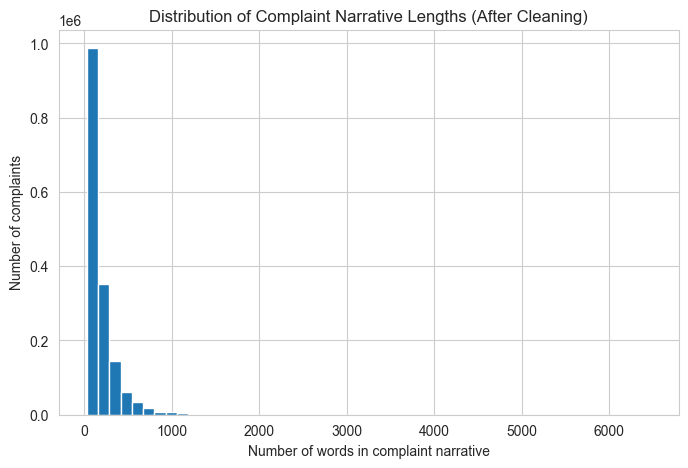

In [15]:
import matplotlib.pyplot as plt

df=pd.read_csv(OUTPUT_PATH)
plt.figure(figsize=(8, 5))
plt.hist(df["n_words"], bins=50)
plt.xlabel("Number of words in complaint narrative")
plt.ylabel("Number of complaints")
plt.title("Distribution of Complaint Narrative Lengths (After Cleaning)")
plt.show()


In [16]:
product_counts = df["Product"].value_counts()
product_counts

Product
Credit reporting or other personal consumer reports    993361
Debt collection                                        303893
Checking or savings account                            132463
Mortgage                                               127504
Credit card                                             74227
Name: count, dtype: int64

In [24]:
from src.embedding import load_embedding_model

emb = load_embedding_model()
test_vector = emb.embed_query("test sentence")
print("Embedding dimension:", len(test_vector))

Embedding model: sentence-transformers/all-MiniLM-L6-v2


c:\Users\hp\Documents\10-acad\week7\Intelligent-Complaint-Analysis-for-Financial-Services\src\embedding.py:7: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  return HuggingFaceEmbeddings(
c:\Users\hp\Documents\10-acad\week7\Intelligent-Complaint-Analysis-for-Financial-Services\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Embedding dimension: 384
